# Tugas
1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:
  - Jumlah cluster yang terbentuk.
  - Banyaknya noise.
  - Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).
4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [ ]:
# NUM ONE
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan
import matplotlib.pyplot as plt
import pandas as pd

df = load_wine()
X = df.data
y = df.target

In [ ]:
# HDBSCAN CLUSTERING
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
clusterer.fit(X_scaled)

hdbscan_labels = clusterer.labels_
n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)

print(f"HDBSCAN menemukan {n_clusters} cluster.")
print(f"Jumlah titik noise (label -1): {sum(hdbscan_labels == -1)}")

HDBSCAN menemukan 2 cluster.
Jumlah titik noise (label -1): 82


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/tmp/ipython-input-2168529720.py:27: UserWarning: Mismatched number of handles and labels: len(handles) = 3 len(labels) = 2
  plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(n_clusters)])


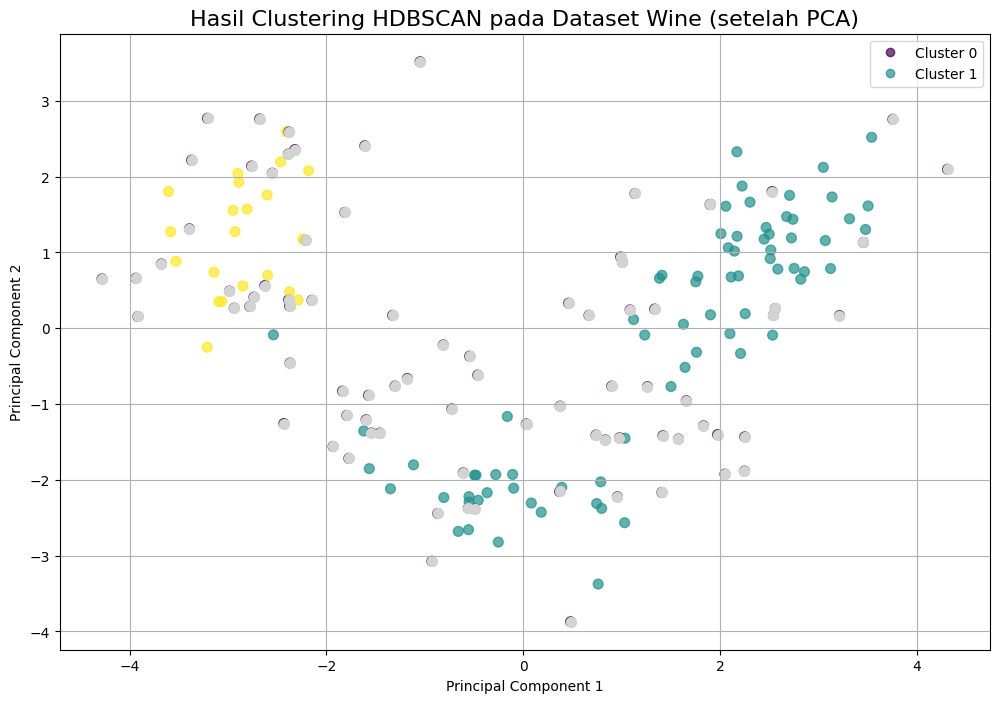

In [ ]:
# Jadikan 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Membuat DataFrame
df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot['cluster'] = hdbscan_labels
df_plot['true_class'] = y

# Membuat plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df_plot['PC1'],
    df_plot['PC2'],
    c=df_plot['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

noise_points = df_plot[df_plot['cluster'] == -1]
plt.scatter(noise_points['PC1'], noise_points['PC2'], c='lightgray', s=50, label='Noise')

plt.title('Hasil Clustering HDBSCAN pada Dataset Wine (setelah PCA)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(n_clusters)])
plt.grid(True)
plt.show()

Nomor 3:

- Hasil Cluster yang ditemukan adalah sebanyak 2
- Noise yang ditemukan dengan `n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)` adalah sebanyak 82
- Visualisasi

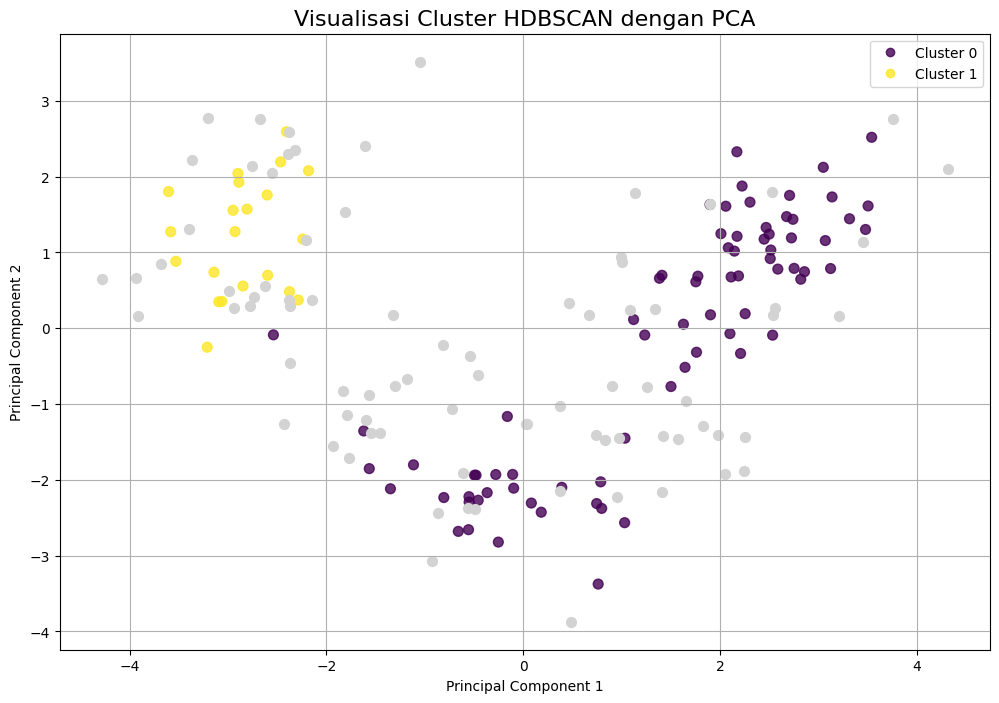

In [ ]:
# 1. Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Membuat DataFrame untuk plotting
df_plot_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_plot_pca['cluster'] = hdbscan_labels

# 3. Membuat plot
plt.figure(figsize=(12, 8))
# Memisahkan data cluster dan noise untuk pewarnaan
clusters = df_plot_pca[df_plot_pca['cluster'] != -1]
noise = df_plot_pca[df_plot_pca['cluster'] == -1]

# Plot data yang ter-cluster
scatter = plt.scatter(clusters['PC1'], clusters['PC2'], c=clusters['cluster'], cmap='viridis', s=50, alpha=0.8)

# Plot data noise dengan warna abu-abu
plt.scatter(noise['PC1'], noise['PC2'], c='lightgray', s=50, label='Noise')

plt.title('Visualisasi Cluster HDBSCAN dengan PCA', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(n_clusters)])
plt.grid(True)
plt.show()

Hasil Analisis:

Hasil dari label DBSCAN dan labeling aslinya, HDBSCAN cukup berhasil mengidentifikasi struktur utama dalam data, tetapi cenderung menganggap perbatasan antar kelas sebagai noise, maka masilnya adalah belum sesuai.